<a href="https://colab.research.google.com/github/rakib2624/MachineLearningProjects/blob/main/Another_copy_of_CNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load the dataset from cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the value
train_images, test_images = train_images / 255.0, test_images / 255.0

# declaration of the classes
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Build the ANN Model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the ANN model
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ann.fit(train_images, train_labels, epochs=64,batch_size=50, validation_data=(test_images, test_labels))

test_loss, test_acc = ann.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/64
1000/1000 [==============================] - 9s 7ms/step - loss: 1.8877 - accuracy: 0.3240 - val_loss: 1.7361 - val_accuracy: 0.3878
Epoch 2/64
1000/1000 [==============================] - 8s 8ms/step - loss: 1.7066 - accuracy: 0.3913 - val_loss: 1.6536 - val_accuracy: 0.4069
Epoch 3/64
1000/1000 [==============================] - 8s 8ms/step - loss: 1.6367 - accuracy: 0.4162 - val_loss: 1.6437 - val_accuracy: 0.4165
Epoch 4/64
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5842 - accuracy: 0.4352 - val_loss: 1.6063 - val_accuracy: 0.4276
Epoch 5/64
1000/1000 [==============================] - 8s 8ms/step - loss: 1.5485 - accuracy: 0.4467 - val_loss: 1.5387 - val_accuracy: 0.4549
Epoch 6/64
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5201 - accuracy: 0.4578 - val_loss: 1.5578 - val_accuracy: 0.4378
Epoch 7/64
1000/1000 [==============================] - 8s 8ms/step -

In [ ]:
import numpy as np

train_filter = np.isin(train_labels, classes_to_keep).reshape(-1)
test_filter = np.isin(test_labels, classes_to_keep).reshape(-1)
train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Build CNN Model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes_to_keep), activation='softmax')
])

# Compile CNN Model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(train_images, train_labels, epochs=20,batch_size=50, validation_data=(test_images, test_labels))

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
1000/1000 [==============================] - 121s 59ms/step - loss: 1.5626 - accuracy: 0.4295 - val_loss: 1.2931 - val_accuracy: 0.5392
Epoch 2/20
1000/1000 [==============================] - 61s 61ms/step - loss: 1.1831 - accuracy: 0.5799 - val_loss: 1.0635 - val_accuracy: 0.6259
Epoch 3/20
1000/1000 [==============================] - 60s 60ms/step - loss: 1.0313 - accuracy: 0.6396 - val_loss: 1.0235 - val_accuracy: 0.6367
Epoch 4/20
1000/1000 [==============================] - 61s 61ms/step - loss: 0.9309 - accuracy: 0.6772 - val_loss: 0.9750 - val_accuracy: 0.6584
Epoch 5/20
1000/1000 [==============================] - 61s 61ms/step - loss: 0.8568 - accuracy: 0.7025 - val_loss: 0.9286 - val_accuracy: 0.6759
Epoch 6/20
1000/1000 [==============================] - 59s 59ms/step - loss: 0.7997 - accuracy: 0.7210 - val_loss: 0.8784 - val_accuracy: 0.6995
Epoch 7/20
1000/1000 [==============================] - 58s 59ms/step - loss: 0.7498 - accuracy: 0.7375 - val_loss: 0.8771 

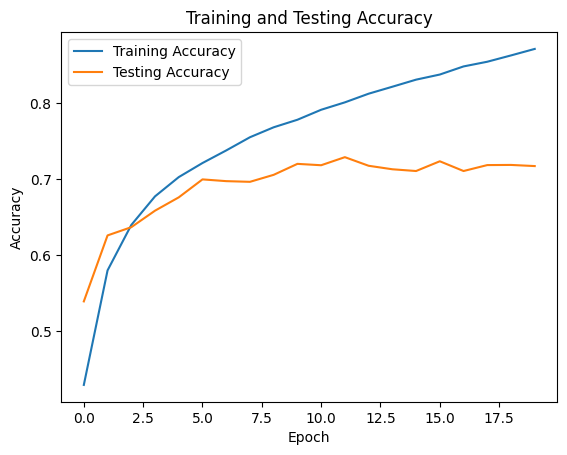

In [ ]:
import matplotlib.pyplot as plt

# Training and Testing accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
def aggregate_classes(class_names, classes_to_keep):
    return {class_index: class_name for class_index, class_name in zip(classes_to_keep, class_names)}

def plot_sample_by_label(X, y, label, class_dict):
    indices = np.where(y == label)[0]
    index = np.random.choice(indices)
    image = X[index]
    class_name = class_dict[label]
    return image, class_name

class_dict = aggregate_classes(class_names, classes_to_keep)

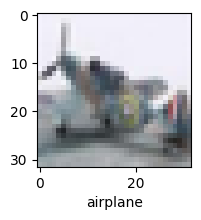

In [ ]:
label = 0
image, class_name = plot_sample_by_label(train_images, train_labels, label, class_dict)
plt.figure(figsize=(15, 2))
plt.imshow(image)
plt.xlabel(class_name)
plt.show()

In [ ]:
print("Missing values in train images: ", np.isnan(train_images).sum())
print("Missing values in test images:", np.isnan(test_images).sum())

Missing values in train images:  0
Missing values in test images: 0


In [ ]:
print("Number of duplicate rows in train images:", len(train_images) - len(np.unique(train_images, axis=0)))
print("Number of duplicate rows in test images:", len(test_images) - len(np.unique(test_images, axis=0)))

Number of duplicate rows in train images: 0
Number of duplicate rows in test images: 0


In [ ]:
cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 1.0595 - accuracy: 0.7170


[1.0595245361328125, 0.7170000076293945]

In [ ]:
def plot_sample(X, y, index):
    index = int(index)
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[int(y[index])])

In [ ]:
test_labels[:5]

array([0.61960784, 0.43921569, 0.19215686, 0.62352941, 0.43529412])

In [ ]:
y_prd = cnn.predict(test_images)
y_prd[:5]

313/313 [==============================] - 4s 11ms/step


array([[6.0668998e-07, 2.3443130e-07, 5.4713673e-05, 9.8950642e-01,
        6.2566279e-08, 1.0085339e-02, 3.4878057e-04, 1.5937148e-06,
        1.7444506e-06, 5.1568031e-07],
       [2.0335441e-05, 2.0308598e-05, 1.6385463e-12, 1.4085698e-10,
        3.1247756e-13, 1.9698113e-11, 2.1545564e-15, 1.9871329e-14,
        9.9995333e-01, 5.9937315e-06],
       [2.5314212e-02, 8.0015054e-03, 3.1577903e-05, 3.1489519e-05,
        1.9460770e-06, 1.0742801e-04, 5.6692679e-06, 4.2522792e-05,
        9.6474898e-01, 1.7145989e-03],
       [9.8461205e-01, 1.4743236e-05, 1.4026680e-04, 1.2582574e-04,
        6.3074622e-05, 7.8644502e-05, 1.4982858e-06, 9.0545946e-05,
        1.4870048e-02, 3.2015353e-06],
       [3.9590728e-10, 1.5287674e-07, 5.4214746e-02, 3.2675810e-02,
        1.3869473e-01, 8.7641465e-04, 7.7289945e-01, 4.2620241e-10,
        6.3561299e-04, 3.0760425e-06]], dtype=float32)

In [ ]:
test_classes = [np.argmax(element) for element in y_prd]
test_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
class_names[test_classes[1]]

'ship'

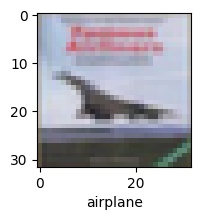

In [ ]:
plot_sample(test_images, test_labels, 3)

In [ ]:
class_names[test_classes[3]]

'airplane'